# Flight Price Prediction Project

## Importing Libraries

In [1]:
#Import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Importing all required libraries

## Loading the Dataset

In [2]:
#Import the dataset

df_train_fp = pd.read_excel("Data_Train_Flight_Price_Prediction.xlsx")
df_train_fp

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


Here the column 'Price" is our target column making all the remaining columns as our features using which we need to predict our label. Since the values present in the "Price" column has continous data which makes it a Regression problem.

## Shape of data with number of rows and columns


In [3]:
df_train_fp.shape

(10683, 11)

There are 10683 rows and 11 columns in dataset

In [4]:
#checking column names
df_train_fp.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
#checking the datatype information
df_train_fp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## Statistical Analysis

In [6]:
df_train_fp.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


The describe method shows only the numeric datatype information. As there is only one numeric column i.e., 'price' in our dataset, so it's giving information about that single column while the other columns got ingnored.

## Datatypes of all columns

In [7]:
df_train_fp.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

The Price column is having integer datatype and rest all the columns are having object datatype.

## Checking for null values

In [8]:
#check for is there any null values present in the dataset 

df_train_fp.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

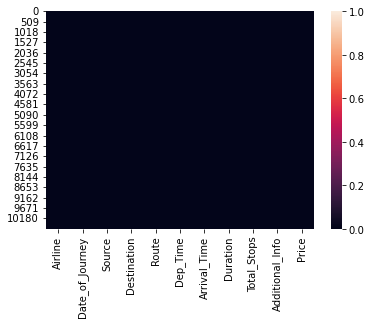

In [9]:
#To check missing values using heatmap
sns.heatmap(df_train_fp.isnull())

We see that there are 2 columns with only one missing value in the dataset.

In [10]:
#checking unique values
df_train_fp.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In the above cell, we can see the number of unique values each column of our dataset contains.

## Data Pre-processing

In [11]:
def preprocessing(df_train_fp):
    df_train_fp=df_train_fp.copy()
    df_train_fp['Date_of_Journey']=pd.to_datetime(df_train_fp['Date_of_Journey'])
    df_train_fp['Year_of_Journey']=df_train_fp['Date_of_Journey'].dt.year
    df_train_fp['Month_of_Journey']=df_train_fp['Date_of_Journey'].dt.month
    df_train_fp['Day_of_Journey']=df_train_fp['Date_of_Journey'].dt.day
    df_train_fp['Total_Stops']=df_train_fp['Total_Stops'].fillna(df_train_fp['Total_Stops'].mode()[0])
    df_train_fp=df_train_fp.drop(['Route','Date_of_Journey','Duration'],axis=1)
    return df_train_fp

- In the above cell, we have converted the 'Date_of_journey' column into Year, Month, Day and then dropping that column.
- We have also filled the missing value in the Total_stops column with mode because Total_stops column is having object datatype.
- We have dropped the columns Route and duration as they are not providing much insight for our model prediction.

In [12]:
def pre_processing(df_train_fp):
    df_train_fp['Dep_hour']=pd.to_datetime(df_train_fp['Dep_Time']).dt.hour
    df_train_fp['Dep_minute']=pd.to_datetime(df_train_fp['Dep_Time']).dt.minute
    df_train_fp=df_train_fp.drop(['Dep_Time'],axis=1)
    df_train_fp['Arrival_hour']=pd.to_datetime(df_train_fp['Arrival_Time']).dt.hour
    df_train_fp['Arrival_minute']=pd.to_datetime(df_train_fp['Arrival_Time']).dt.minute
    df_train_fp=df_train_fp.drop(['Arrival_Time'],axis=1)
    return df_train_fp

- In the above cell, we have converted the Dep_Time column into departure hour and minute. and then dropping the Dep_Time column.
- We have also converted the Arrival_Time column into arrival hour and minute; and then dropping the Arrival_Time column.

In [13]:
#checking the dataset
df_train_fp = preprocessing(df_train_fp)
df_train_fp

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Year_of_Journey,Month_of_Journey,Day_of_Journey
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,05:50,13:15,2 stops,No info,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,2 stops,No info,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,1 stop,No info,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,1 stop,No info,13302,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,non-stop,No info,4107,2019,9,4
10679,Air India,Kolkata,Banglore,20:45,23:20,non-stop,No info,4145,2019,4,27
10680,Jet Airways,Banglore,Delhi,08:20,11:20,non-stop,No info,7229,2019,4,27
10681,Vistara,Banglore,New Delhi,11:30,14:10,non-stop,No info,12648,2019,1,3


In [14]:
df_train_fp = pre_processing(df_train_fp)
df_train_fp

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Year_of_Journey,Month_of_Journey,Day_of_Journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,2 stops,No info,7662,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,2019,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,2019,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,2019,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,2019,4,27,20,45,23,20
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,2019,4,27,8,20,11,20
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,2019,1,3,11,30,14,10


# EDA (Exploratory Data Analysis)

## Uni Variate Analysis

Uni variate analysis works with only one variable, hence it is called as uni variate.

In [15]:
x = df_train_fp.drop(['Price'], axis=1, inplace=False) # This column has numerical values

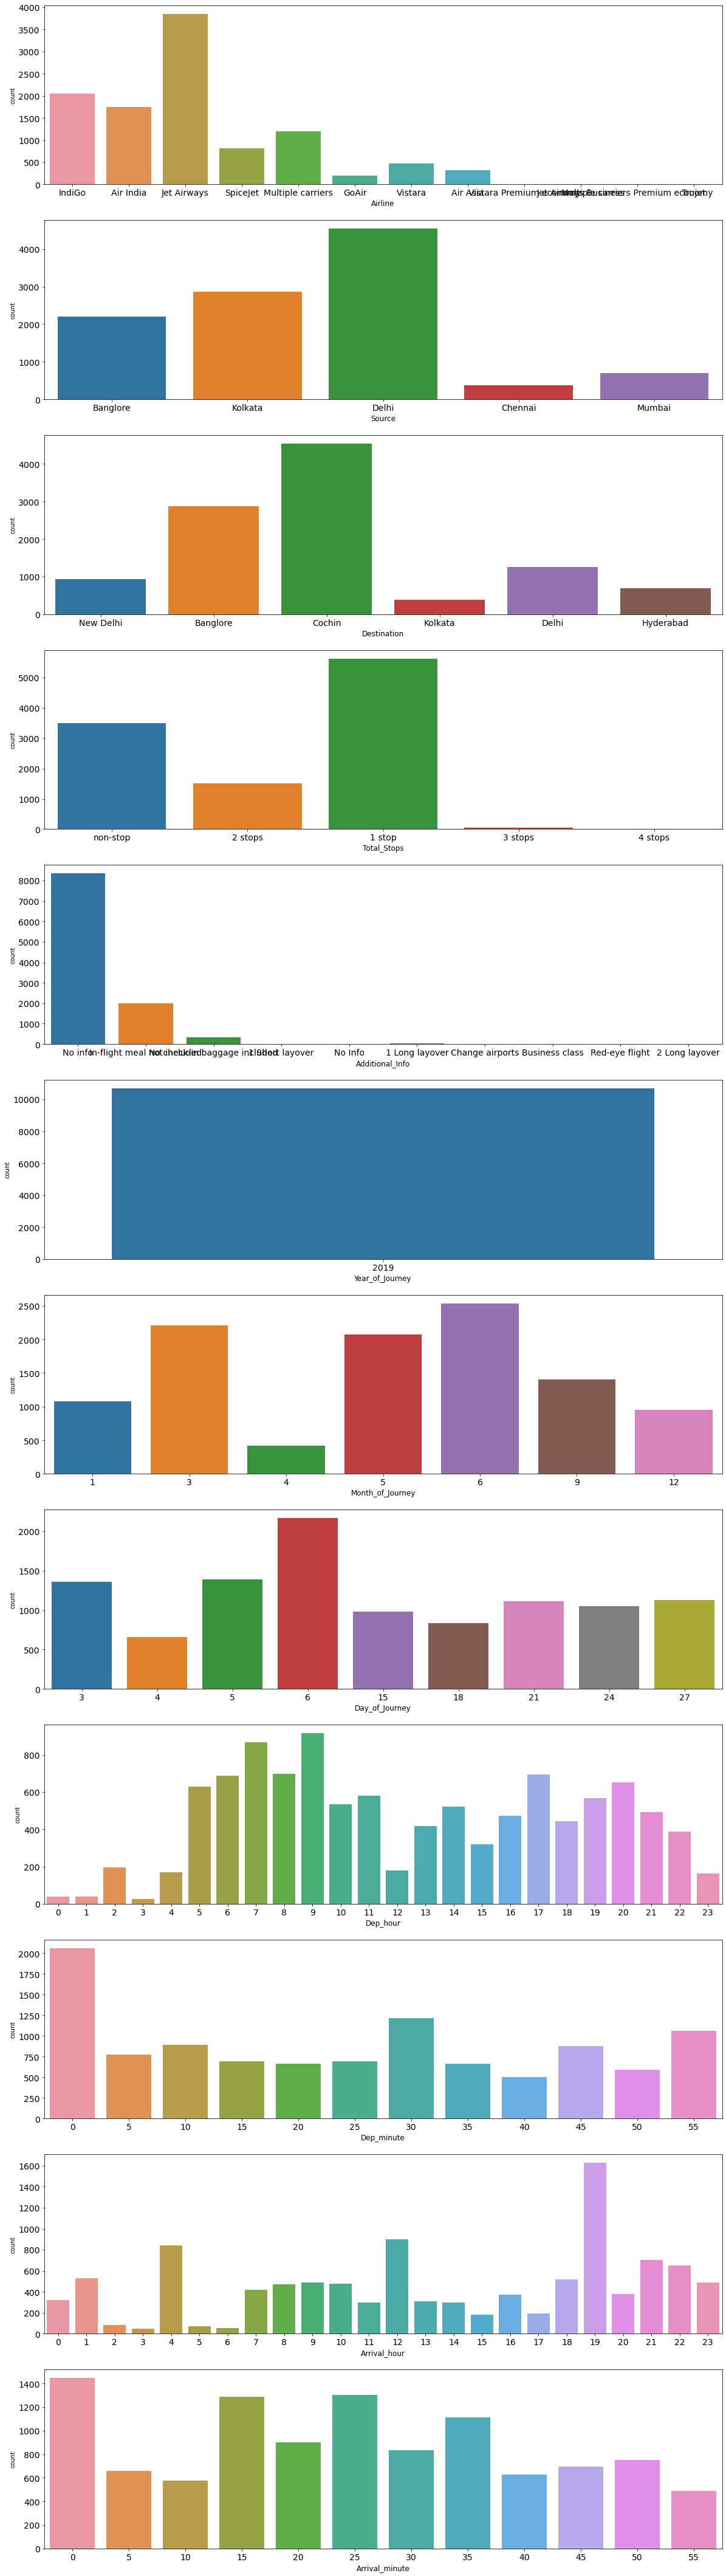

In [16]:
plt.figure(figsize = (20,90))
plot_number = 1

for i in x:
    if plot_number <= 14: # as we can see there are 13 columns in the dataset
        plt.subplot(14,1,plot_number)
        sns.countplot(x[i])
        plt.xlabel(i, fontsize=12)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        
    plot_number += 1
plt.show()

From the above plots, we can see that,
1. In the Airline column, the count for Jet Airways is the highest which means that mostly people travelled in Jet Airways, followed by Indigo and AirIndia. Less people travelled with GoAir.
2. In the Source column, Majority of the flights travelled from Delhi to various destinations, followed by Kolkata and Bangalore. Less than 1000 flights travelled from Mumbai and Chennai.
3. In the Destination column, majority of the people travelled to Cochin which is followed by Bangalore and Delhi. Lesser people travelled to Kolkata.
4. In the Total_stops column, Majority of the people travelled in the flights having only one stop. Around 3500 people chose non-stop flights. Around 1500 people travelled in flights having 2 stops.
5. In the Additional_Info column, No info has the highest count about more than 8000. 'In-flight meal not included' has around 2000 counts followed by 'No check-in baggage included' havinh less than 500 counts. While the rest have very less to negligible counts.
6. In the Year_of_Journey column, We can see that there is only 2019 years' journey data is present in our dataset.
7. In the Month_of_Journey column, The highest number of people travelled in the month of June followed by March, May and September. Around 1000 people travelled in the month of January and December. Less than 500 people travelled in the month of April.
8. In the Day_of_Journey column, we can see that most of the people were travelled on dates 6,5 and the least travelling dates are for 4,18.
9. In the Dep_hour column, we can see that most of the people were spent 9 or 7 hours during journey and least of the people spent 0,1 or 3 hours.
10. In the Dep_minute column, highest count is for 0 minute and lowest count is for 40 minutes.
11. In the Arrival_hour, highest count is for 19 hours and lowest count is for 3,6 hours.
12. In the Arrival_minute, highest count is for 0 minute and lowest count is for 55 minutes.

In [17]:
def pie_chart(x):
    plt.figure(figsize=(10,5))
    plt.pie(x.value_counts(), labels=x.value_counts().index, autopct='%1.2f%%')
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

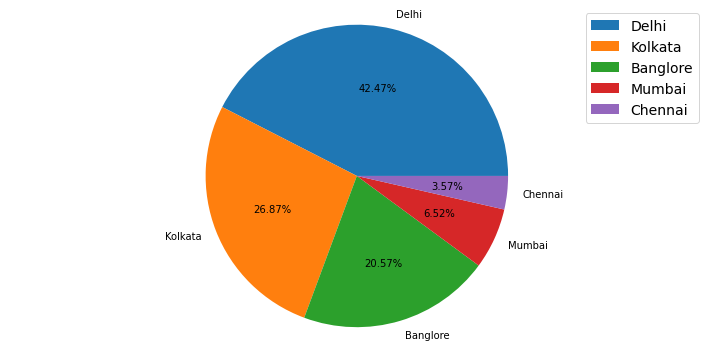

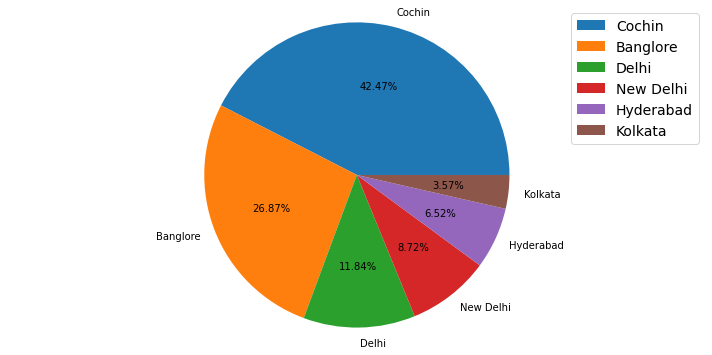

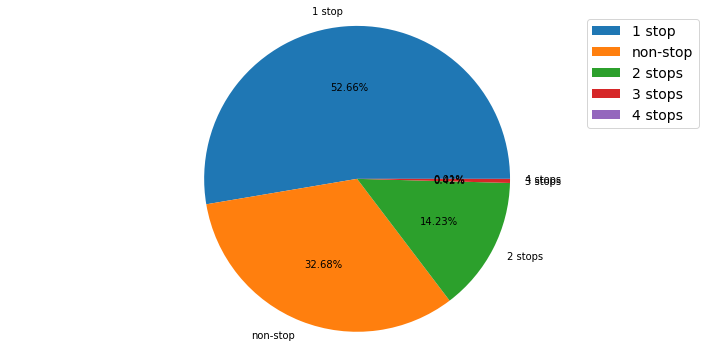

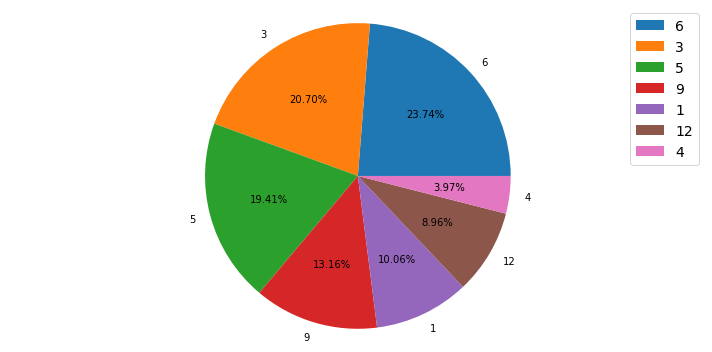

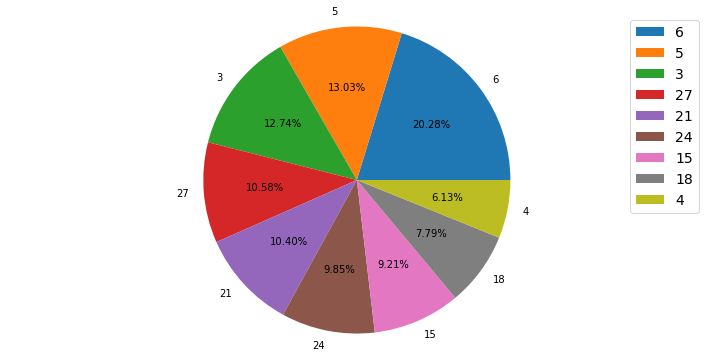

In [18]:
pie_chart(df_train_fp['Source'])
pie_chart(df_train_fp['Destination'])
pie_chart(df_train_fp['Total_Stops'])
pie_chart(df_train_fp['Month_of_Journey'])
pie_chart(df_train_fp['Day_of_Journey'])

- From the Source column, we can see that the highest number of rows (42.47%) is covered by Delhi and the lowest number of rows (3.57%) covered by Chennai
- From the Destination column, we see that the highest number of rows(42.47%) covered by Cochin and the lowest number (3.57%) of rows covered by Kolkata.
- From the Total_Stops column, we see that the highest number of rows(52.66%) covered by 1 stop and the lowest number of rows (0.01%) covered by 4 stops.
- From the Month_of_Journey column, we see that most of the journey made by people were in the month of June(23.74%) and least in the month of April(3.97%)
- From the Day_of_Journey column, we can see that most of the people were travelled on dates 6,5 and the least travelling dates are for 4,18.

### Bivariate Analysis

Bivariate Analysis works with two variables.

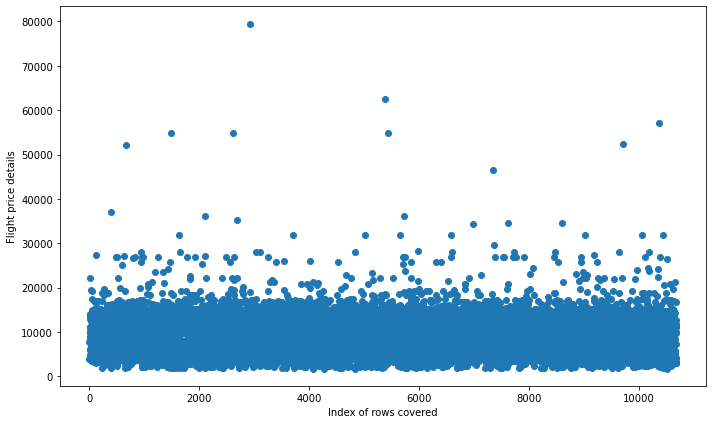

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(df_train_fp.index, df_train_fp['Price'])
plt.xlabel("Index of rows covered")
plt.ylabel("Flight price details")
plt.tight_layout()
plt.show()

In the above plot, we can see that most of the flight price values are accumulated between 0-20000 and few data points are distributed above.

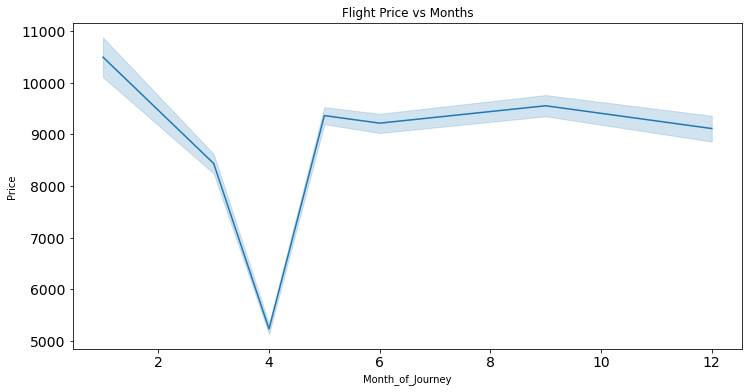

In [20]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Month_of_Journey',y='Price',data=df_train_fp)
plt.title("Flight Price vs Months")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

From the above plot, we see that the flight price was highest in the first month, then it started to decrease gradually till it reached 4th month and then again it started to rise till 5th month and after that the price was almost stable till 12th month.

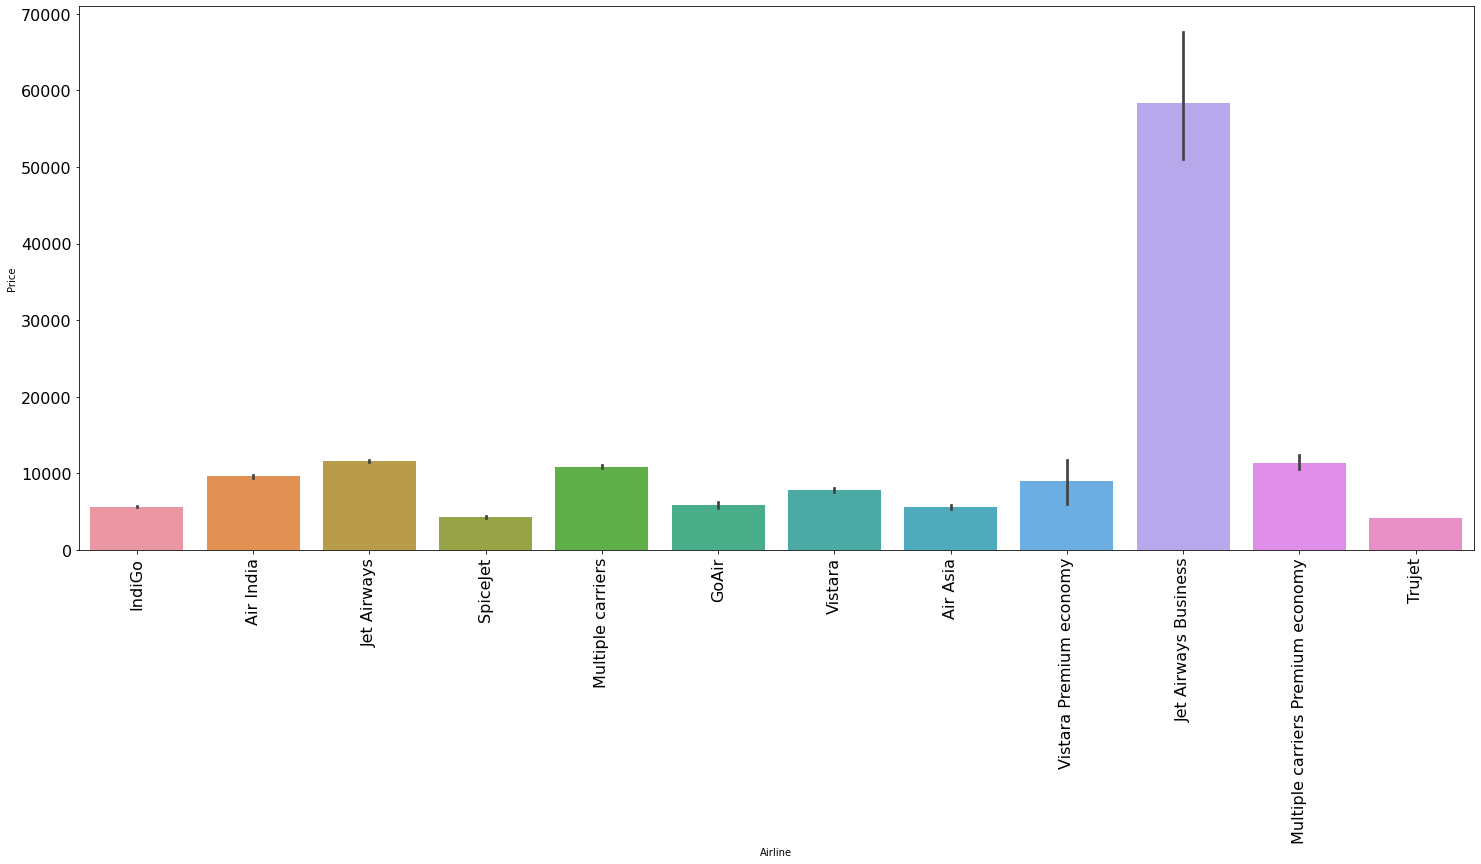

In [21]:
plt.figure(figsize=(25,10))
sns.barplot(x='Airline',y='Price',data=df_train_fp)
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=16)
plt.show()

From the above plot we can see that-
- the flight ticket price was highest for the Jet Airways Business.
- Jet Airways ,Mutiple carriers, Mutiple carriers Premium economy, vistara premium, vistara, and Air India have medium price tickets i.e., nor too high neither low.
- Spicejet, Indigo, GoAir, Air Asia and Trujet was offering the cheapest flight ticket.

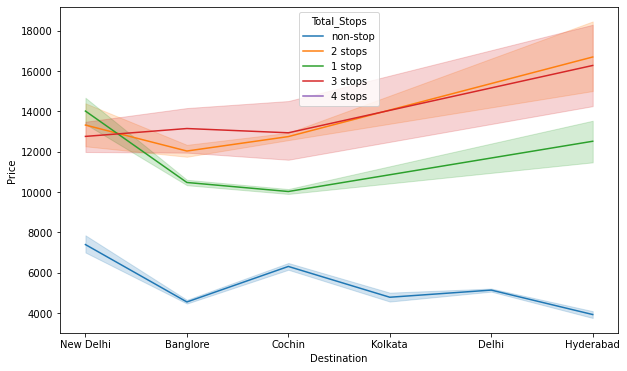

In [22]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Destination', y='Price', hue='Total_Stops', data=df_train_fp)
plt.show()

From the above plot, we can see that non stop flights have lower price irrespective of the destination as compared to flights that have 1 or more stops before reaching the final destination.

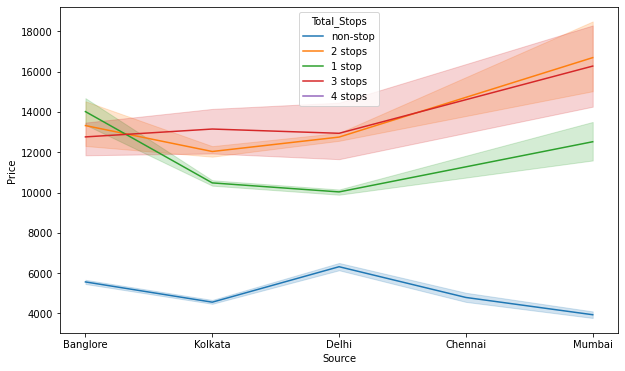

In [23]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Source', y='Price', hue='Total_Stops', data=df_train_fp)
plt.show()

In the above plot, we see that non stop flights have lower price irrespective of the source as compared to flights that have 1 or more stops.

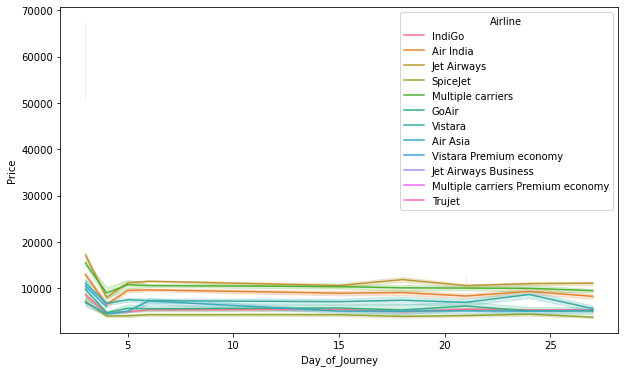

In [24]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Day_of_Journey', y='Price', hue='Airline', data=df_train_fp)
plt.show()

From the above plot, we see that all the airlines have high price between 1-5th day of each month and than reduces a bit for the remaining days of the month.

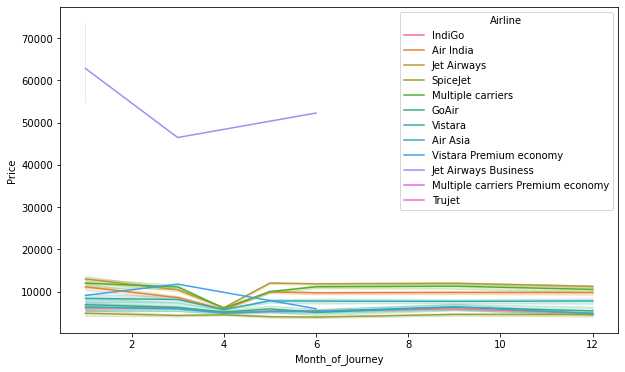

In [25]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Month_of_Journey', y='Price', hue='Airline', data=df_train_fp)
plt.show()

In the above plot, we see that 'Jet Airways Business class' has the highest price than the rest probably because the remaining flights offer the economy class as well.

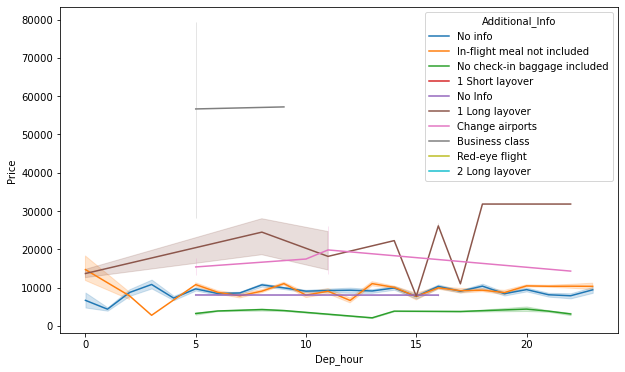

In [26]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Dep_hour', y='Price', hue='Additional_Info', data=df_train_fp)
plt.show()

In the above plot, we see that 'Business class' has high price and it's departure hour is between 5-10; the second highest pricing is for '1 Long layover' with a spike in between 17-22 departure hour.

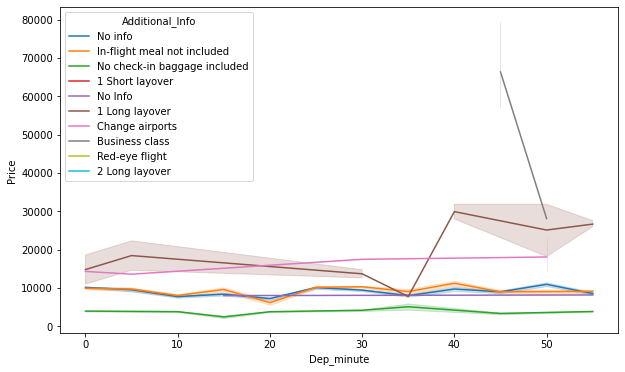

In [27]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Dep_minute', y='Price', hue='Additional_Info', data=df_train_fp)
plt.show()

In the above plot, we see that 'Business class' has high price and has data coverage for departure minutes between 45-50 minutes roughly. '1 Long layover' has a spike at 40min and it stays almost like that till 50+ mins.

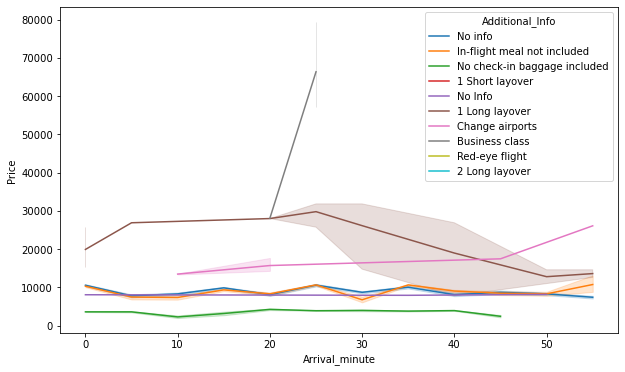

In [28]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Arrival_minute', y='Price', hue='Additional_Info', data=df_train_fp)
plt.show()

In the above plot, we see that 'Business class' again has an exponential rise in price and the arrival minutes mostly range between 20-30 minutes. Next, '1 Long layover' has the second highest price having a spike at the 25th arrival minute and then the price starts to decrease.

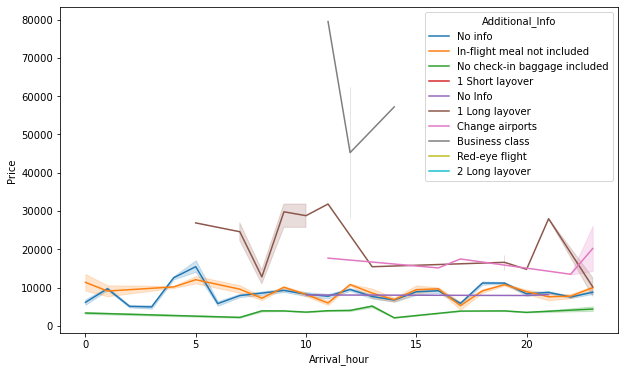

In [29]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Arrival_hour', y='Price', hue='Additional_Info', data=df_train_fp)
plt.show()

In the above plot, we see that price for 'business class' is highest as compared to 'No check-in bag included' being the least during arrival hour. The arrival hour for 'Business class' is spread only between 10-15 while for 'No check-in bag included' it is spread between the entire range.

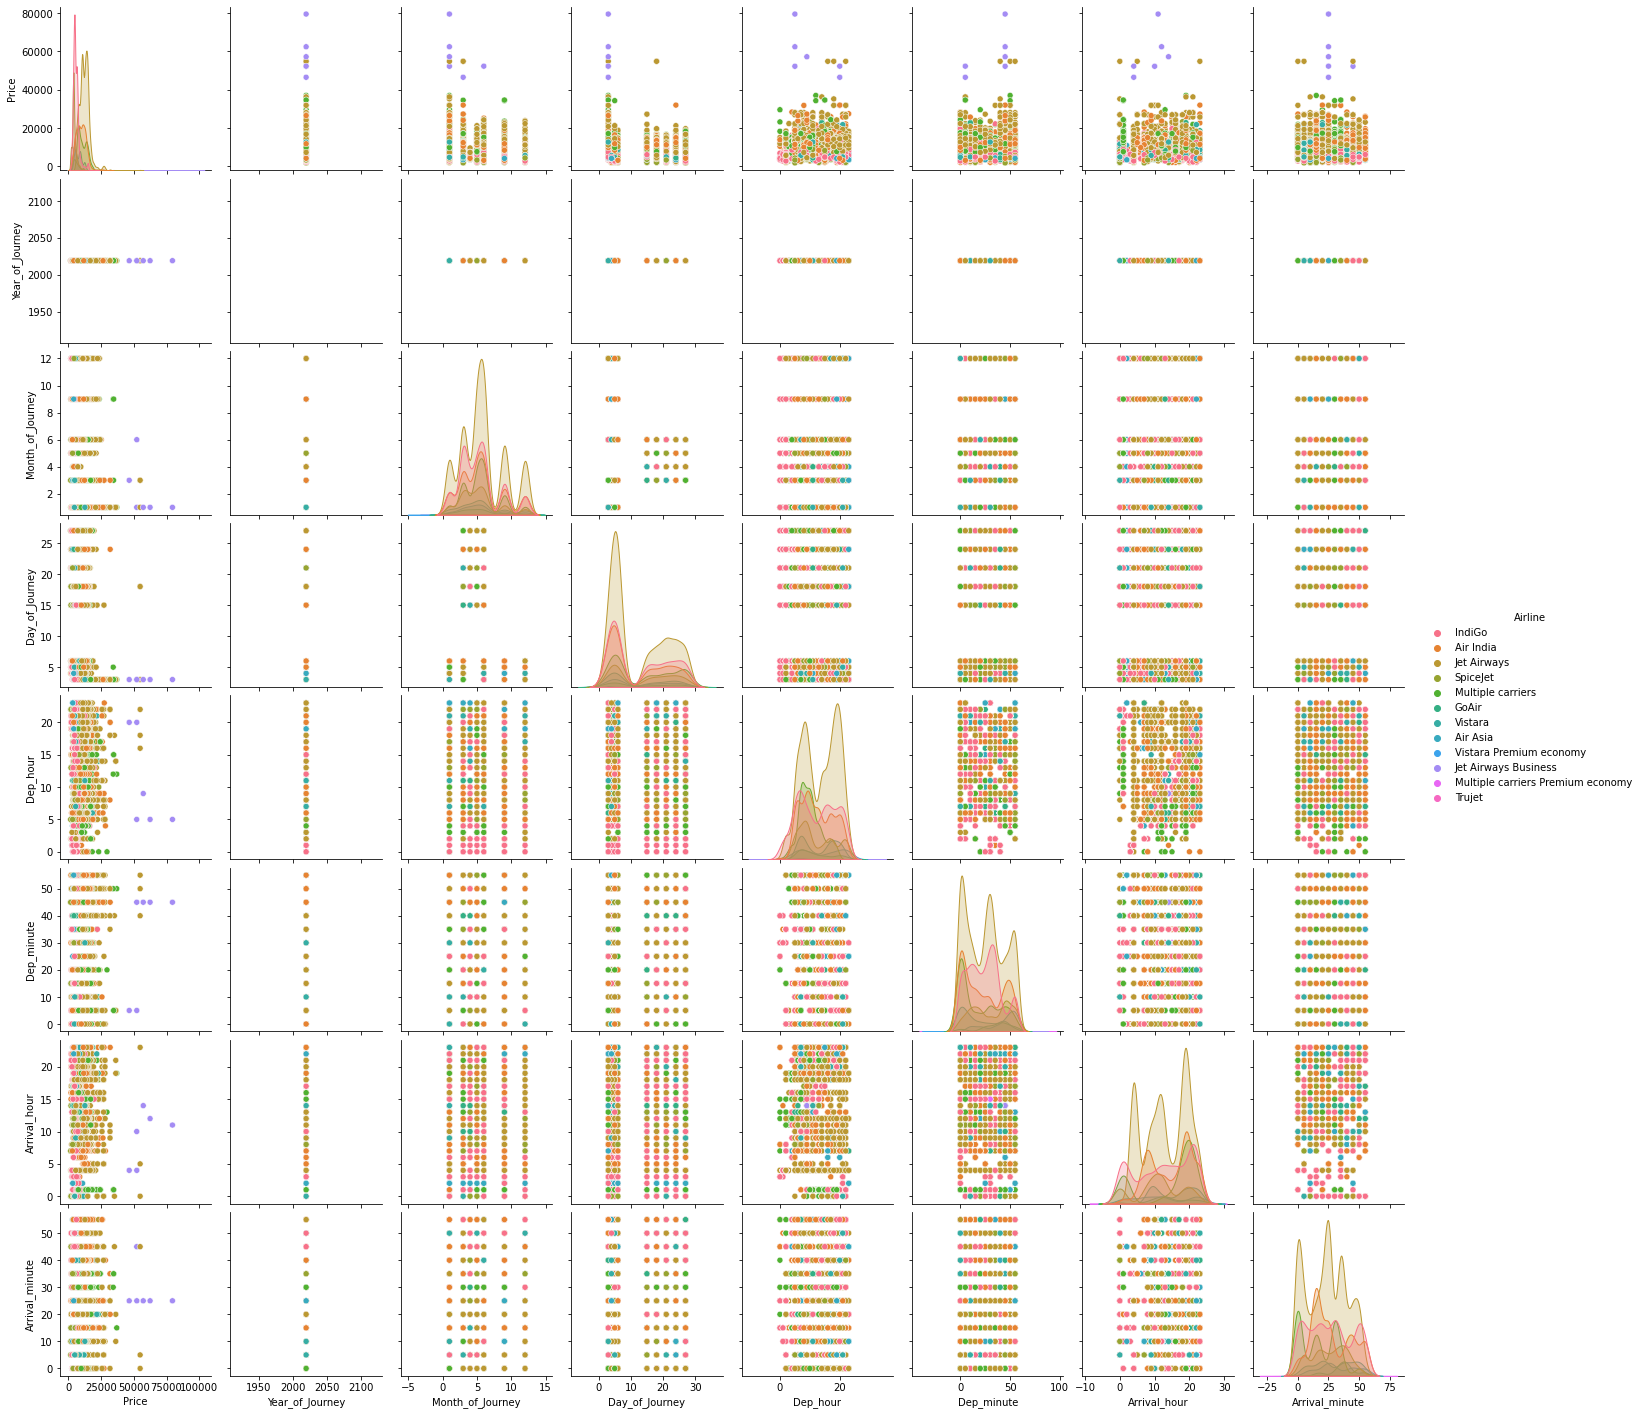

In [30]:
sns.pairplot(df_train_fp, hue='Airline', diag_kind='kde')

The above pairplot gives an indication on the numerical data considering the different airlines present in our dataset.

## Encoding the categorical columns

In [31]:
df_train_fp['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [32]:
df_train_fp['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [33]:
df_train_fp['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [34]:
df_train_fp['Total_Stops'].value_counts()

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [35]:
df_train_fp['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df_train_fp['Airline']=le.fit_transform(df_train_fp['Airline'])
df_train_fp['Source']=le.fit_transform(df_train_fp['Source'])
df_train_fp['Destination']=le.fit_transform(df_train_fp['Destination'])
df_train_fp['Total_Stops']=le.fit_transform(df_train_fp['Total_Stops'])
df_train_fp['Additional_Info']=le.fit_transform(df_train_fp['Additional_Info'])

Here we are using Label Encoder method for encoding the categorical features

In [37]:
df_train_fp['Airline'].value_counts()

4     3849
3     2053
1     1752
6     1196
8      818
10     479
0      319
2      194
7       13
5        6
11       3
9        1
Name: Airline, dtype: int64

In [38]:
df_train_fp['Source'].value_counts()

2    4537
3    2871
0    2197
4     697
1     381
Name: Source, dtype: int64

In [39]:
df_train_fp['Destination'].value_counts()

1    4537
0    2871
2    1265
5     932
3     697
4     381
Name: Destination, dtype: int64

In [40]:
df_train_fp['Total_Stops'].value_counts()

0    5626
4    3491
1    1520
2      45
3       1
Name: Total_Stops, dtype: int64

In [41]:
df_train_fp['Additional_Info'].value_counts()

8    8345
5    1982
7     320
0      19
4       7
3       4
6       3
1       1
9       1
2       1
Name: Additional_Info, dtype: int64

In [42]:
df_train_fp

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Year_of_Journey,Month_of_Journey,Day_of_Journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,3,0,5,4,8,3897,2019,3,24,22,20,1,10
1,1,3,0,1,8,7662,2019,1,5,5,50,13,15
2,4,2,1,1,8,13882,2019,9,6,9,25,4,25
3,3,3,0,0,8,6218,2019,12,5,18,5,23,30
4,3,0,5,0,8,13302,2019,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,8,4107,2019,9,4,19,55,22,25
10679,1,3,0,4,8,4145,2019,4,27,20,45,23,20
10680,4,0,2,4,8,7229,2019,4,27,8,20,11,20
10681,10,0,5,4,8,12648,2019,1,3,11,30,14,10


array([[<AxesSubplot:title={'center':'Airline'}>,
        <AxesSubplot:title={'center':'Source'}>,
        <AxesSubplot:title={'center':'Destination'}>,
        <AxesSubplot:title={'center':'Total_Stops'}>],
       [<AxesSubplot:title={'center':'Additional_Info'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Year_of_Journey'}>,
        <AxesSubplot:title={'center':'Month_of_Journey'}>],
       [<AxesSubplot:title={'center':'Day_of_Journey'}>,
        <AxesSubplot:title={'center':'Dep_hour'}>,
        <AxesSubplot:title={'center':'Dep_minute'}>,
        <AxesSubplot:title={'center':'Arrival_hour'}>],
       [<AxesSubplot:title={'center':'Arrival_minute'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

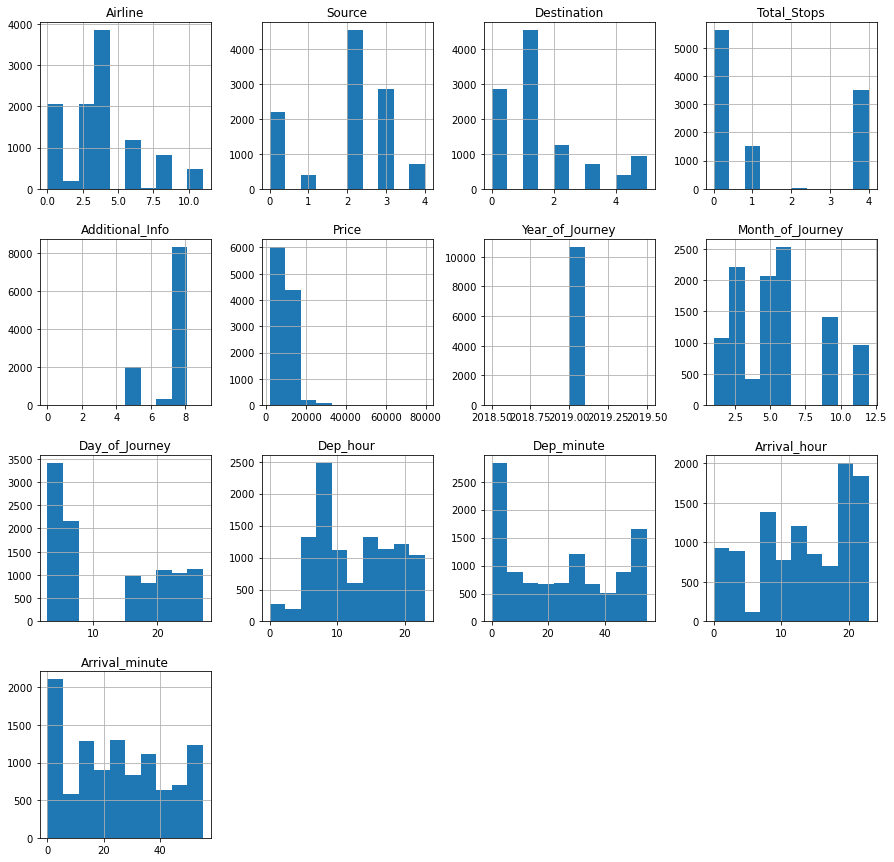

In [43]:
#checking the data distribution in our columns encoding 
df_train_fp.hist(figsize=(15,15))

## Multivariate Analysis:

In [44]:
#Checking Correlation
df_train_fp.corr()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Year_of_Journey,Month_of_Journey,Day_of_Journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
Airline,1.000000,-0.013401,0.018479,0.036064,-0.060802,-0.039520,NaN,-0.007918,0.031218,-0.035194,-0.060044,-0.007491,-0.071089
Source,-0.013401,1.000000,-0.592574,-0.225601,-0.022107,0.015998,NaN,0.063052,0.007560,0.059044,-0.056991,0.025632,0.021040
Destination,0.018479,-0.592574,1.000000,0.337883,0.026806,-0.071112,NaN,-0.105039,-0.052076,-0.072979,0.127892,-0.039710,0.017196
Total_Stops,0.036064,-0.225601,0.337883,1.000000,0.164009,-0.571174,NaN,-0.056524,0.043907,0.039268,0.048813,-0.095598,0.175973
Additional_Info,-0.060802,-0.022107,0.026806,0.164009,1.000000,-0.065478,NaN,-0.009098,-0.019456,-0.051010,-0.019339,0.026173,0.041311
Price,-0.039520,0.015998,-0.071112,-0.571174,-0.065478,1.000000,NaN,0.010700,-0.165412,0.006819,-0.024492,0.024264,-0.086155
Year_of_Journey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month_of_Journey,-0.007918,0.063052,-0.105039,-0.056524,-0.009098,0.010700,NaN,1.000000,-0.264899,0.028180,0.002152,-0.004338,-0.025786
Day_of_Journey,0.031218,0.007560,-0.052076,0.043907,-0.019456,-0.165412,NaN,-0.264899,1.000000,-0.002251,-0.016521,-0.002124,-0.021424
Dep_hour,-0.035194,0.059044,-0.072979,0.039268,-0.051010,0.006819,NaN,0.028180,-0.002251,1.000000,-0.024806,0.005215,0.067909


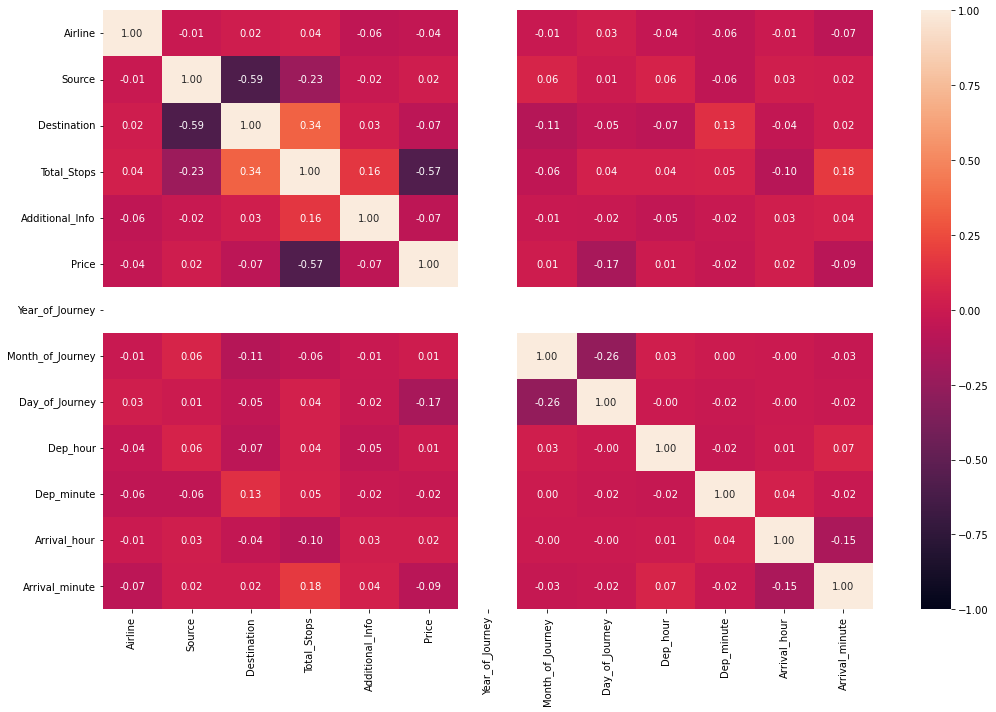

In [45]:
df_correlation = df_train_fp.corr()

plt.figure(figsize = (15,10))
sns.heatmap(df_correlation, vmin=-1, vmax= 1, annot=True, fmt='.2f')
plt.tight_layout()

From the above heatmap, we can say that most of the columns are having less correlation and there is no multi-collinearity concerns in the dataset. Year_of_Journey column has only one unique value so we can drop that column as it has no impact of our model

In [46]:
#Dropping the column Year_of_Journey as it has only one value i.e., 2019
df_train_fp.drop(['Year_of_Journey'], axis=1, inplace=True) 

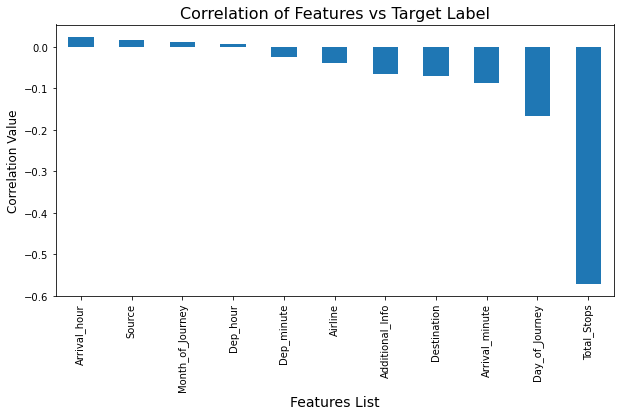

In [47]:
df_correlation = df_train_fp.corr()
plt.figure(figsize=(10,5))
df_correlation['Price'].sort_values(ascending=False).drop('Price').plot.bar()
plt.title("Correlation of Features vs Target Label", fontsize=16)
plt.xlabel("Features List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

With the help of above plot, we can see the correlation between our Features and Target Label. Here we see that feature columns like arrival hour, source, month of journey and departure hours are positively correlated with our target and remaining feature columns are negatively correlated where Total_Stops is highly negatively correlated which indicates that as the number of Total Stops increases the price of that particular flight also increases and vice-versa.

## Preparation for model building

In [48]:
x=df_train_fp.drop('Price',axis=1)
y=df_train_fp['Price']

## Checking outliers using boxplot:

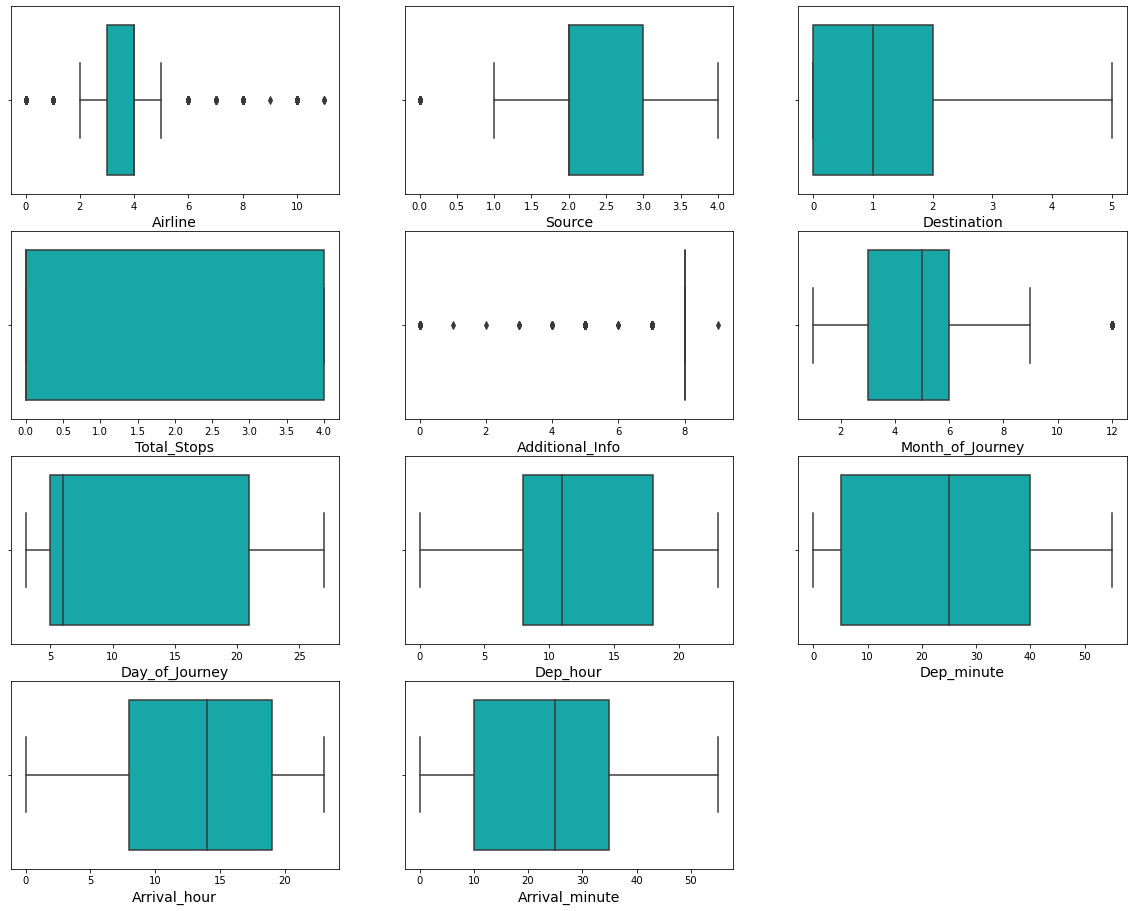

In [49]:
plt.figure(figsize = (20,20))
plot_number = 1

for i in x:
    if plot_number <= 14: 
        plt.subplot(5,3,plot_number)
        sns.boxplot(x[i], color = 'c')
        plt.xlabel(i,fontsize=14)
        
    plot_number += 1
plt.show()

Using the boxplot to see the the outliers present in our dataset but since all of the feature columns are categorical data, we don't have to worry about the presence of outliers here.

## Checking skewness:

In [50]:
x.skew()

Airline             0.731095
Source             -0.424054
Destination         1.244169
Total_Stops         0.631681
Additional_Info    -1.779838
Month_of_Journey    0.629540
Day_of_Journey      0.367373
Dep_hour            0.113073
Dep_minute          0.167029
Arrival_hour       -0.369988
Arrival_minute      0.110945
dtype: float64

Just like outliers, we don't need to remove skewness for categorical columns.

## Note:

Here, we are not going to scale the feature columns because there is not any continuous feature in x i.e., the feature columns are categorical so scaling the feature is not required.

## Training multiple models:

In [51]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
import scikitplot as skplt
from yellowbrick.classifier.rocauc import roc_auc

In [52]:
models={
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "SupportVectorRegressor":SVR()
}

## Finding Best Random State

In [54]:
maxAccuracy = 0
maxRandomState = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.30, random_state=i)
    dt= DecisionTreeRegressor()
    dt.fit(x_train, y_train)
    pred = dt.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccuracy:
        maxAccuracy=acc
        maxRandomState=i
print("Best accuracy is ",maxAccuracy, "on Random_state ", maxRandomState)

Best accuracy is  0.8610206222642343 on Random_state  128


In [55]:
#splitting the train test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=128)

## Finding the best model:

--------------- LinearRegression ---------------
MEAN SQUARED ERROR 14975408.681715839
MEAN ABSOLUTE ERROR 2701.544702279043
CVS_SCORE 0.36778752370059353
R2_SCORE 0.36112963113671015
RMSE 3869.8073184224354


MODEL PERFORMANCE CURVE


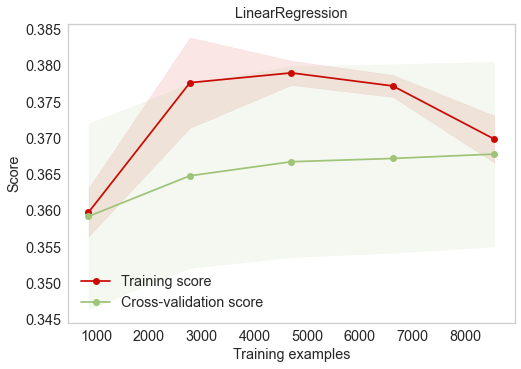

--------------- Lasso ---------------
MEAN SQUARED ERROR 14975716.456846397
MEAN ABSOLUTE ERROR 2701.531399744161
CVS_SCORE 0.3677877252025665
R2_SCORE 0.36111650105022197
RMSE 3869.847084426773


MODEL PERFORMANCE CURVE


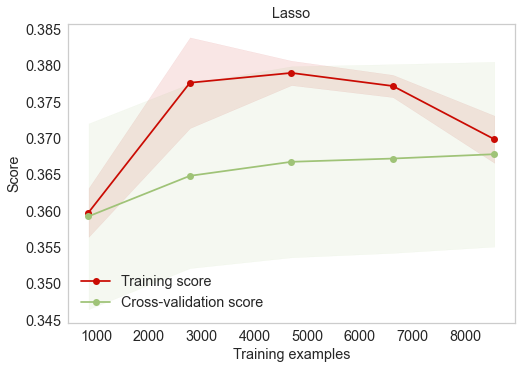

--------------- DecisionTreeRegressor ---------------
MEAN SQUARED ERROR 2884998.7408649675
MEAN ABSOLUTE ERROR 723.0092043681748
CVS_SCORE 0.8116312262752243
R2_SCORE 0.87692220967586
RMSE 1698.528404491655


MODEL PERFORMANCE CURVE


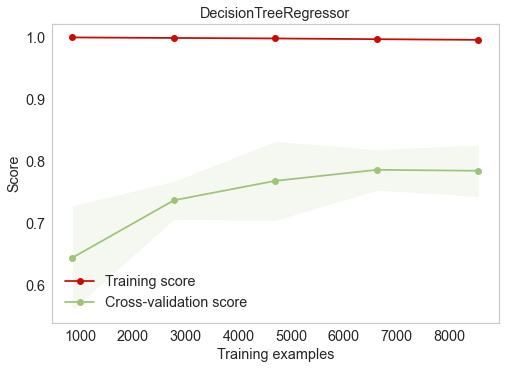

--------------- RandomForestRegressor ---------------
MEAN SQUARED ERROR 2423362.8486823193
MEAN ABSOLUTE ERROR 701.2379308625592
CVS_SCORE 0.8853872986109123
R2_SCORE 0.8966161959294271
RMSE 1556.7154038816213


MODEL PERFORMANCE CURVE


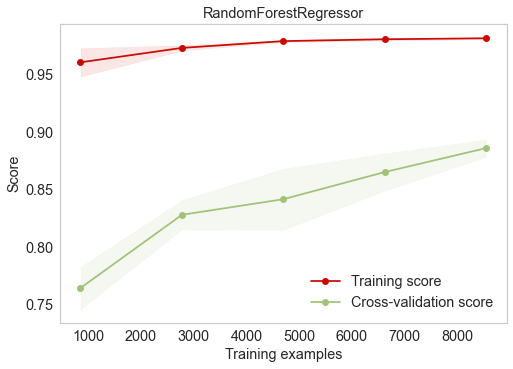

--------------- AdaBoostRegressor ---------------
MEAN SQUARED ERROR 15579082.871357368
MEAN ABSOLUTE ERROR 3296.886121905106
CVS_SCORE 0.3587134381115709
R2_SCORE 0.33537610678178464
RMSE 3947.0346934575286


MODEL PERFORMANCE CURVE


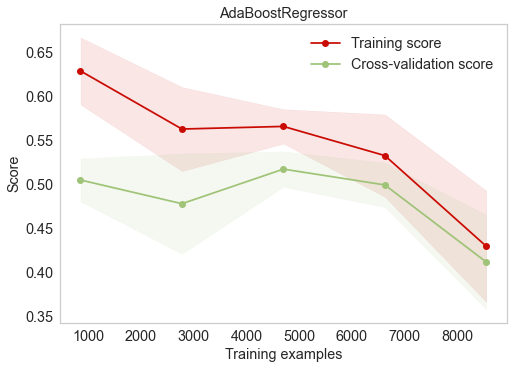

--------------- SupportVectorRegressor ---------------
MEAN SQUARED ERROR 23948330.905925058
MEAN ABSOLUTE ERROR 3717.7784836311653
CVS_SCORE -0.017896997055788243
R2_SCORE -0.021666875656541462
RMSE 4893.703189398092


MODEL PERFORMANCE CURVE


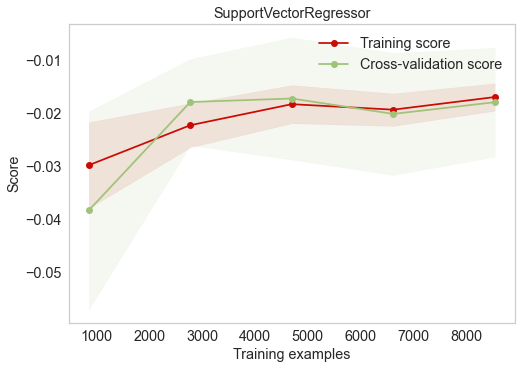

In [56]:
CVS=[]
R2=[]
MSE=[]
MAE=[]
RMSE=[]
MODEL=[]
for name, model in models.items():
    print("-"*15,name,"-"*15)
    MODEL.append(name)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    MSE.append(mse)
    print("MEAN SQUARED ERROR",mse)
    mae=mean_absolute_error(y_test,y_pred)
    MAE.append(mae)
    print("MEAN ABSOLUTE ERROR",mae)
    cvs=cross_val_score(model,x,y,scoring='r2',cv=5).mean()
    CVS.append(cvs)
    print("CVS_SCORE",cvs)
    r2=r2_score(y_test,y_pred)
    R2.append(r2)
    print("R2_SCORE",r2)
    rmse=np.sqrt(mse)
    RMSE.append(rmse)
    print("RMSE",rmse)
    print("\n")
    print('MODEL PERFORMANCE CURVE')
    skplt.estimators.plot_learning_curve(model,x,y,cv=5,scoring='r2',title=name,text_fontsize='large')
    plt.show()

In [57]:
#making a dataframe
models_df = pd.DataFrame({
    "Models":MODEL,
    "Cross_Val_Score":CVS,
    "R2_score":R2,
    "Mean_squared_error":MSE,
    "Mean_Absolute_Error":MAE,
    "RMSE":RMSE
})

models_df

,Models,Cross_Val_Score,R2_score,Mean_squared_error,Mean_Absolute_Error,RMSE
0,LinearRegression,0.367788,0.361130,1.497541e+07,2701.544702,3869.807318
1,Lasso,0.367788,0.361117,1.497572e+07,2701.531400,3869.847084
2,DecisionTreeRegressor,0.811631,0.876922,2.884999e+06,723.009204,1698.528404
3,RandomForestRegressor,0.885387,0.896616,2.423363e+06,701.237931,1556.715404
4,AdaBoostRegressor,0.358713,0.335376,1.557908e+07,3296.886122,3947.034693
5,SupportVectorRegressor,-0.017897,-0.021667,2.394833e+07,3717.778484,4893.703189


## We are selecting Random Forest Regressor as our final model since it has less Mae value and less RMSE and also it is giving good cross_val_score of 0.89 as compared to other models

## Hyperparameter tuning our best ML model:

In [58]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [59]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [60]:
param_class={
 'bootstrap': [True,False],
 'criterion': ['squared_error','absolute_error', 'poisson'],
 'max_depth': [None,1,2,3],
 'max_features': [None,'sqrt','log2'],
 'max_samples': [None,1,2]}

In [61]:
Grid_classifier=GridSearchCV(estimator=rfr,param_grid=param_class,cv=5)

In [62]:
Grid_classifier.fit(x,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [None, 1, 2, 3],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_samples': [None, 1, 2]})

In [63]:
Grid_classifier.best_params_

{'bootstrap': True,
 'criterion': 'poisson',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_samples': None}

In [64]:
Grid_classifier.best_score_

0.8899791764951355

After successfully incorporating the Hyper Parameter Tuning on the Final Model we received the best score for it i.e., 88.99%

## Final Model Learning Curve:

In [65]:
rfrr=RandomForestRegressor(
 bootstrap= True,
 criterion= 'poisson',
 max_depth= None,
 max_features= 'sqrt',
 max_samples= None)

<AxesSubplot:title={'center':'Final Model Learnig Curve'}, xlabel='Training examples', ylabel='Score'>

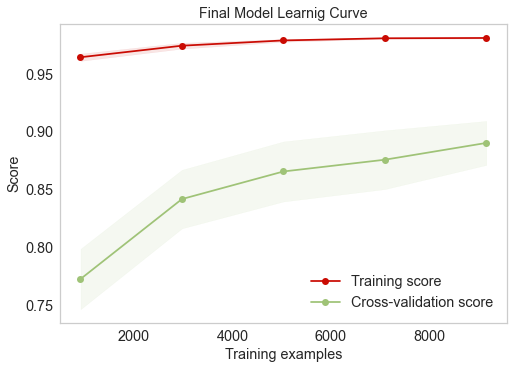

In [66]:
skplt.estimators.plot_learning_curve(rfrr,x,y,cv=7,scoring='r2',text_fontsize='large',title='Final Model Learnig Curve')

## Cross Validation Score of Final Model:

In [67]:
new_cross_validation=cross_val_score(rfrr,x,y,cv=5).mean()
new_cross_validation

0.8888545783461754

## Final Model Metrics:

In [68]:
rfrr.fit(x_train,y_train)
pred_rfrr=rfrr.predict(x_test)

print("Mean squared error",mean_squared_error(y_test,pred_rfrr))
print("Mean absolute error",mean_absolute_error(y_test,pred_rfrr))
print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,pred_rfrr)))
print("R2 Score",r2_score(y_test,pred_rfrr))
print("Model score",rfrr.score(x_test,y_test))

Mean squared error 2721826.8774386635
Mean absolute error 768.254955951762
Root Mean Squared Error 1649.796010856695
R2 Score 0.8838833331277062
Model score 0.8838833331277062


## The R2 score of final regression model is 88.38%

## Saving the model:

In [70]:
import joblib
joblib.dump(rfrr,"Flight_Price_Prediction_Model.obj")

['Flight_Price_Prediction_Model.obj']

## Loading the model:

In [71]:
model=joblib.load('Flight_Price_Prediction_Model.obj')

In [72]:
model.predict(x_test)

array([13941.44      , 13368.1       , 13619.22      , ...,
        5155.71      ,  9180.34033333, 15662.58375   ])

## Loading the Testing dataset:

In [73]:
df_test_fp = pd.read_excel('Data_Test_Flight_Price_Prediction.xlsx')
df_test_fp

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


We have imported the test dataset that consists of feature columns only and we need to predict the target label. However, before applying our final regression model we need to perform all the pre-processing steps that we applied on our training dataset.

In [74]:
df_test_fp=preprocessing(df_test_fp)
df_test_fp=pre_processing(df_test_fp)

In [75]:
#dropping a column 
df_test_fp.drop(['Year_of_Journey'], axis=1, inplace=True)

In [76]:
#using labelencoder to transform the 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df_test_fp['Airline']=le.fit_transform(df_test_fp['Airline'])
df_test_fp['Source']=le.fit_transform(df_test_fp['Source'])
df_test_fp['Destination']=le.fit_transform(df_test_fp['Destination'])
df_test_fp['Total_Stops']=le.fit_transform(df_test_fp['Total_Stops'])
df_test_fp['Additional_Info']=le.fit_transform(df_test_fp['Additional_Info'])

In [77]:
df_test_fp

,Airline,Source,Destination,Total_Stops,Additional_Info,Month_of_Journey,Day_of_Journey,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,4,2,1,0,5,6,6,17,30,4,25
1,3,3,0,0,5,12,5,6,20,10,20
2,4,2,1,0,3,5,21,19,15,19,0
3,6,2,1,0,5,5,21,8,0,21,0
4,0,0,2,4,5,6,24,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,0,5,6,6,20,30,20,25
2667,3,3,0,4,5,3,27,14,20,16,55
2668,4,2,1,0,5,6,3,21,50,4,25
2669,1,2,1,0,5,6,3,4,0,19,15


## Testing data Price prediction:

In [78]:
model.predict(df_test_fp)

array([10305.28,  4430.53, 14467.4 , ..., 14121.12, 13220.01,  7998.  ])

## Conclusion

1. The training dataset was containing one continuous value which was our target column 'Price'.
2. We analysed the dataset and then we performed EDA to understand the data in a better way and have written the observation also.
3. We performed all the pre-processing from data cleaning to data transformation and also did Feature engineering.
4. Since all columns of the dataset was categorical so it was not required to remove outliers and skewness and also to scale the feature columns.
6. After training multiple regression models, we selected Random Forest Regressor as our final model and performed hyperparameter tuning that increased the score
7. Finally we build a model to predict the flight price with accuracy of 88.38%.
8. We performed all the process for test dataset also and predict the flight price.